# Chuẩn bị dữ liệu

In [3]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

# Loại bỏ những thông báo không cần thiết trong quá trình thực thi
warnings.filterwarnings('ignore')

# Load bộ dữ liệu vào biến 'data'
file_path = './social_media_data_1000 (1).csv'
data = pd.read_csv(file_path)

# Một số quan sát về dữ liệu

In [4]:
# Xem 5 dòng đầu dữ liệu
data.head()

,Post_ID,User_ID,Age,Gender,Post_Content,Likes,Shares,Comments,Post_Date
0,1,754,25,Male,Enjoying the weather,62,14,4,2024-09-24 03:43:00
1,2,858,52,Male,Watching a movie,108,2,0,2024-09-03 06:14:00
2,3,617,56,Male,Celebrating a birthday,50,45,20,2024-09-23 17:26:00
3,4,325,46,Female,Great day at the park,194,10,22,2024-09-14 10:17:00
4,5,259,31,Female,New blog post up!,23,24,3,2024-09-12 11:38:00


In [5]:
# Xem cấu trúc dữ liệu
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Post_ID       1000 non-null   int64 
 1   User_ID       1000 non-null   int64 
 2   Age           1000 non-null   int64 
 3   Gender        1000 non-null   object
 4   Post_Content  1000 non-null   object
 5   Likes         1000 non-null   int64 
 6   Shares        1000 non-null   int64 
 7   Comments      1000 non-null   int64 
 8   Post_Date     1000 non-null   object
dtypes: int64(6), object(3)
memory usage: 70.4+ KB


Nhận thấy ở đây vẫn còn một số thuộc tính có kiểu 'Object' (tức là cột vẫn chưa xác định được kiểu dữ liệu chuẩn), vì vậy ta sẽ tiến hành đặt lại kiểu dữ liệu cho các thuộc tính này bao gồm:
- 'Gender': chuyển về kiểu dữ liệu 'category', vì sẽ tối ưu vùng nhớ và cho tốc độ xử lý tốt hơn, phù hợp hơn với kiểu thuộc tính chỉ có vài loại giá trị.
- 'Post_Content': chuyển về kiểu 'str' cho loại dữ liệu văn bản.
- 'Post_Date': đưa về định dạng datetime tương ứng
> Mục đích khi chuẩn hóa kiểu dữ liệu là để đảm bảo tính đúng đắn và đầy đủ của dữ liệu, tạo điều kiện thuận lợi cho những phân tích có liên quan sau này.

In [6]:
# Chỉ định kiểu dữ liệu cho `Gender` và `Post_Content`
data['Gender'] = data['Gender'].astype('category')
data['Post_Content'] = data['Post_Content'].astype('string')
data['Post_Date'] = pd.to_datetime(data['Post_Date'])

In [7]:
# Xem thống kê tổng quát của một số thuộc tính
data.describe()

,Post_ID,User_ID,Age,Likes,Shares,Comments,Post_Date
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000
mean,500.500000,602.233000,39.217000,103.040000,25.346000,14.814000,2024-09-17 04:44:00.420000
min,1.000000,100.000000,18.000000,0.000000,0.000000,0.000000,2024-09-01 00:09:00
25%,250.750000,365.750000,28.000000,51.000000,12.750000,7.000000,2024-09-09 23:51:15
50%,500.500000,594.000000,39.000000,107.000000,25.000000,15.000000,2024-09-17 13:13:30
75%,750.250000,853.000000,50.000000,154.250000,39.000000,22.000000,2024-09-24 11:36:15
max,1000.000000,1100.000000,60.000000,200.000000,50.000000,30.000000,2024-10-01 23:43:00
std,288.819436,288.982192,12.419829,58.970857,14.849943,8.787185,NaN


# Xây dựng một số hàm cần thiết cho việc phân tích

In [8]:
# Hàm phân loại độ tuổi
def age_grouping(age):
    if 18 <= age < 31:
        return '18-30'
    elif 31 <= age < 41:
        return '31-40'
    elif 41 <= age < 51:
        return '41-50'
    elif 51 <= age <= 60:
        return '51-60'
    else:
        return 'Khác'  # Để xử lý các trường hợp ngoài phạm vi

# **YÊU CẦU 1: Xác định mối quan hệ giữa số lượt thích của một bài đăng và độ tuổi của người đăng**

Đầu tiên, để đơn giản hóa, ta có thể xem xét mối quan hệ trực tiếp giữa số lượt thích và độ tuổi sử dụng biểu đồ cột, biểu đồ hộp hay biểu đồ phân tán.

Giải thích lý do sử dụng các biểu đồ trên:
- Biểu đồ cột: đây là loại biểu đồ phù hợp khi hai thuộc tính đang xét có 1 loại là category (Age - vì có thể chia thành các nhóm tuổi) và 1 loại là numeric (Likes).
- Biểu đồ hộp: biểu đồ dùng cho việc quan sát phân bố của các điểm dữ liệu.
- Biểu đồ phân tán: một trong những biểu đồ cơ bản để quan sát mối quan hệ của 2 thuộc tính.

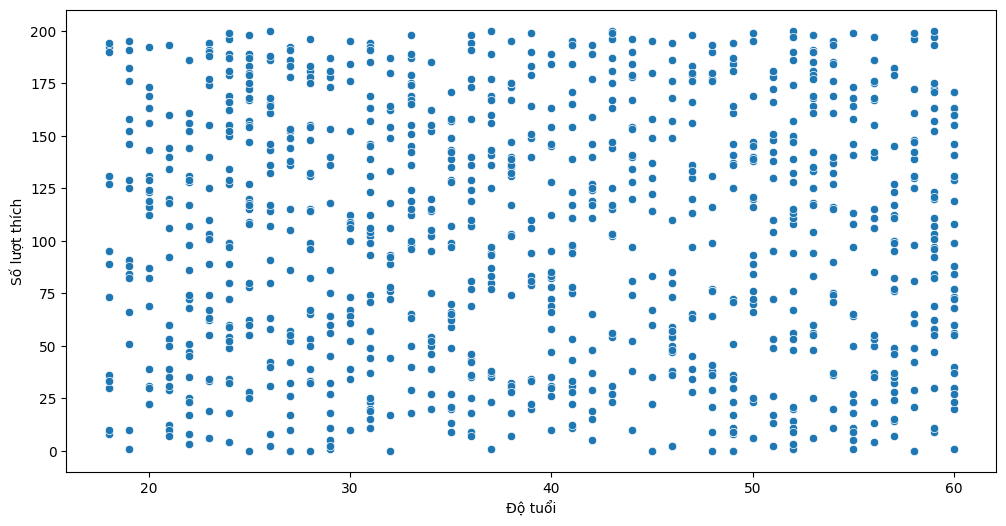

In [9]:
# Vẽ biểu đồ phân tán của số lượt thích và độ tuổi
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='Likes', data=data)
plt.title('')
plt.xlabel('Độ tuổi')
plt.ylabel('Số lượt thích')
plt.show()

> Insight (1): dựa vào biểu đồ scatter thu được, dễ dàng nhận ra với bộ dữ liệu này thì giữa số lượt thích và độ tuổi không thể hiện bất kì một mối quan hệ trực tiếp nào cả vì sự phân bố của các điểm dữ liệu khá ngẫu nhiên và rời rạc.

Tuy nhiên, cần có thêm những phân tích sâu hơn trước khi kết luận về mối quan hệ giữa hai thuộc tính này.

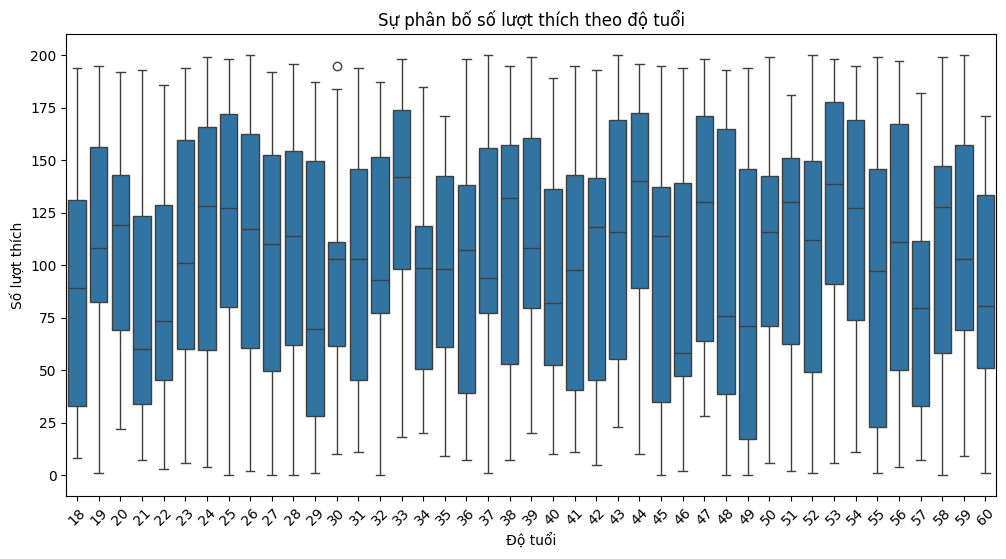

ValueError: Could not interpret value `Grouped_Age` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

In [10]:
# Vẽ box plot để thể hiện mối quan hệ giữa số lượt thích và độ tuổi
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age', y='Likes', data=data)
plt.title('Sự phân bố số lượt thích theo độ tuổi')
plt.xlabel('Độ tuổi')
plt.ylabel('Số lượt thích')
plt.xticks(rotation=45)  # Xoay nhãn trục x nếu cần
plt.show()

# Vẽ box plot để thể hiện mối quan hệ giữa số lượt thích và nhóm tuổi
plt.figure(figsize=(12, 6))
sns.boxplot(x='Grouped_Age', y='Likes', data=data)
plt.title('Sự phân bố số lượt thích theo nhóm tuổi')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Số lượt thích')
plt.xticks(rotation=45)  # Xoay nhãn trục x nếu cần
plt.show()

Ta có thể thấy được là biên độ số lượt thích của mỗi độ tuổi khá là rộng và gần như tương tự nhau, phần lớn tập trung ở số lượt thích từ 50 đến 150 và gần như không có giá trị ngoại lai.

In [137]:
# Phân nhóm các độ tuổi
data['Grouped_Age'] = data['Age'].apply(age_grouping)

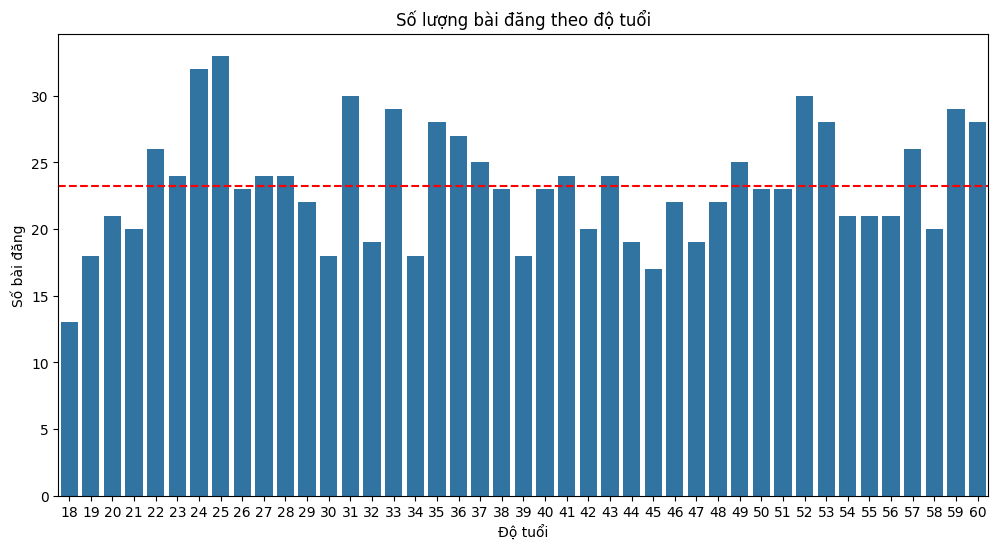

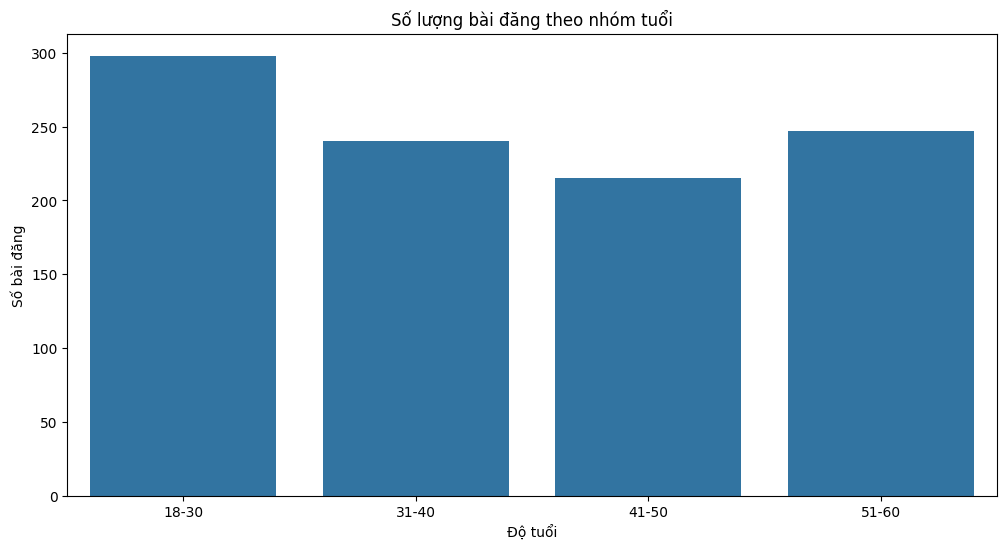

In [166]:
# Số lượng bài viết cho mỗi độ tuổi
posts_by_age = data['Age'].value_counts().sort_index()
mean_posts = posts_by_age.mean()

# Vẽ biểu đồ cột thể hiện số lượng bài đăng của mỗi độ tuổi
plt.figure(figsize=(12, 6))
sns.barplot(x=posts_by_age.index, y=posts_by_age.values)
plt.title('Số lượng bài đăng theo độ tuổi')
plt.xlabel('Độ tuổi')
plt.ylabel('Số bài đăng')
plt.axhline(mean_posts, color='red', linestyle='--', label=f'Trung bình: {mean_posts:.2f}') # Vẽ đường trung bình
plt.show()

# Vẽ biểu đồ cột thể hiện số lượng bài đăng của mỗi nhóm tuổi
posts_by_grouped_age = data['Grouped_Age'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=posts_by_grouped_age.index, y=posts_by_grouped_age.values)
plt.title('Số lượng bài đăng theo nhóm tuổi')
plt.xlabel('Độ tuổi')
plt.ylabel('Số bài đăng')
plt.show()

Số bài đăng ở từng độ tuổi cũng là khác nhau. Tuy nhiên có xu hướng giảm dần về nhóm tuổi từ 41-50.

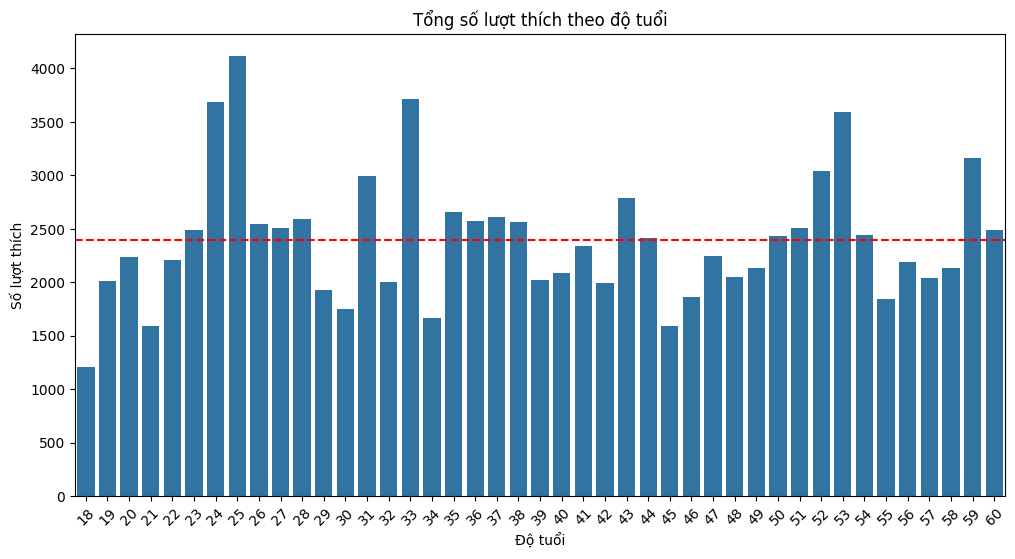

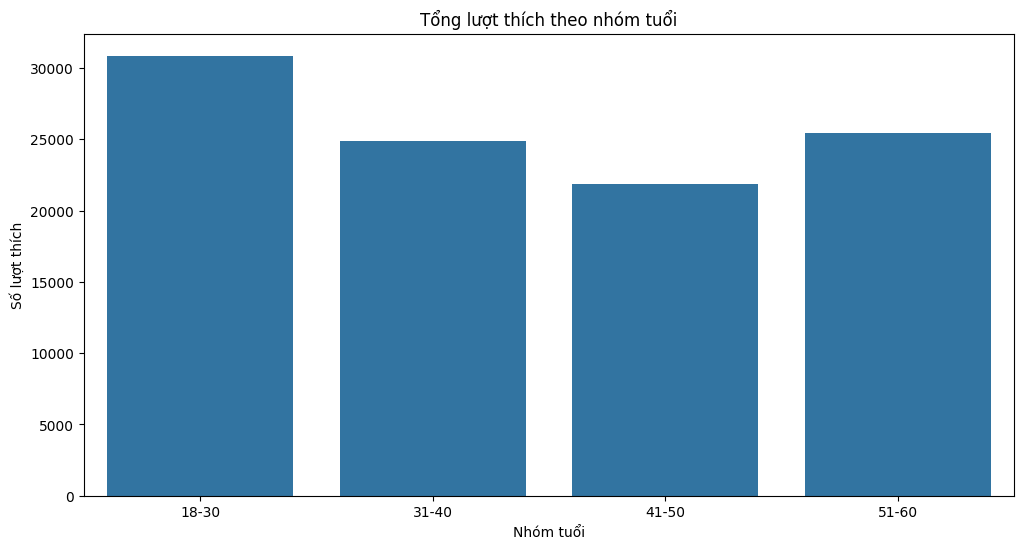

In [138]:
# Vẽ biểu đồ cột tổng số lượt thích theo độ tuổi
total_likes_by_age = data.groupby('Age')['Likes'].sum().reset_index()
mean_total_likes_by_age = total_likes_by_age['Likes'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='Likes', data=total_likes_by_age)
plt.title('Tổng số lượt thích theo độ tuổi')
plt.xlabel('Độ tuổi')
plt.ylabel('Số lượt thích')
plt.xticks(rotation=45)
plt.axhline(mean_total_likes_by_age, color='red', linestyle='--', label=f'Trung bình: {mean_total_likes_by_age:.2f}') # Vẽ đường trung bình
plt.show()

# Vẽ biểu đồ cột tổng số lượt thích theo nhóm tuổi
total_likes_by_grouped_age = data.groupby('Grouped_Age')['Likes'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Grouped_Age', y='Likes', data=total_likes_by_grouped_age)
plt.title('Tổng lượt thích theo nhóm tuổi')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Số lượt thích')
plt.show()

Nếu xét theo độ tuổi, ta không thể thấy được xu hướng rõ ràng của biểu đồ, nhưng có thể thấy được các xu hướng cục bộ là sự thấp hơn trung bình sau đó tăng mạnh vượt trội ở một vài cụm độ tuổi.  
Biểu đồ nhóm tuổi thì thể hiện rõ nét hơn xu hướng, khi tổng số lượt thích đạt cao nhất ở độ tuổi từ trước 30, về sau thì giảm dần về mức thấp nhất ở độ tuổi từ 41-50 sau tăng lên ở độ tuổi ngoài 50.

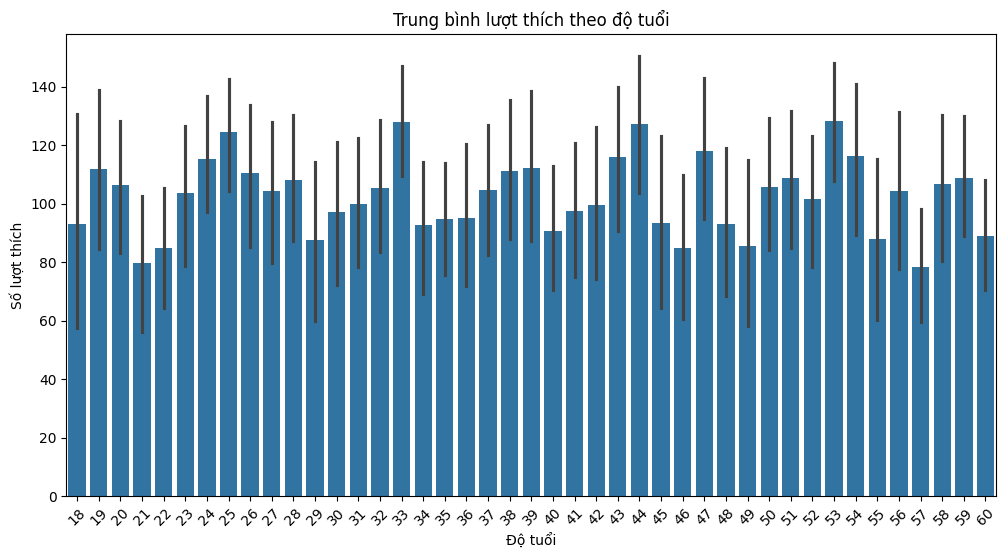

In [167]:
# Vẽ biểu đồ cột giữa độ tuổi và số lượt thích
plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='Likes', data=data)
plt.title('Trung bình lượt thích theo độ tuổi')
plt.xlabel('Độ tuổi')
plt.ylabel('Số lượt thích')
plt.xticks(rotation=45)
plt.show()

Biểu đồ về trung bình lượt thích theo độ tuổi cũng cho thấy xu hướng cục bộ đã nêu ở trên.

> Insight (2): tổng số lượt thích có sự khác nhau ở mỗi độ tuổi, không có xu hướng chung cho toàn bộ nhưng có thể thấy một xu hướng cục bộ đó là tổng số lượt thích sẽ thấp hơn trung bình ở một vài độ tuổi và sau đó tăng vọt ở một hoặc một vài độ tuổi.

Qua hai phân tích trên, ta có thể thấy hình dạng của biểu đồ "tổng lượt thích theo độ tuổi" và "số bài đăng theo độ tuổi" có hình dạng khá tương đồng, điều này càng rõ hơn khi ta quan sát hai biểu đồ theo nhóm tuổi. Đây có thể là "manh mối" cho ta thấy được có mối liên hệ nào đó giữa tổng số lượt thích và số bài đăng theo từng độ tuổi.

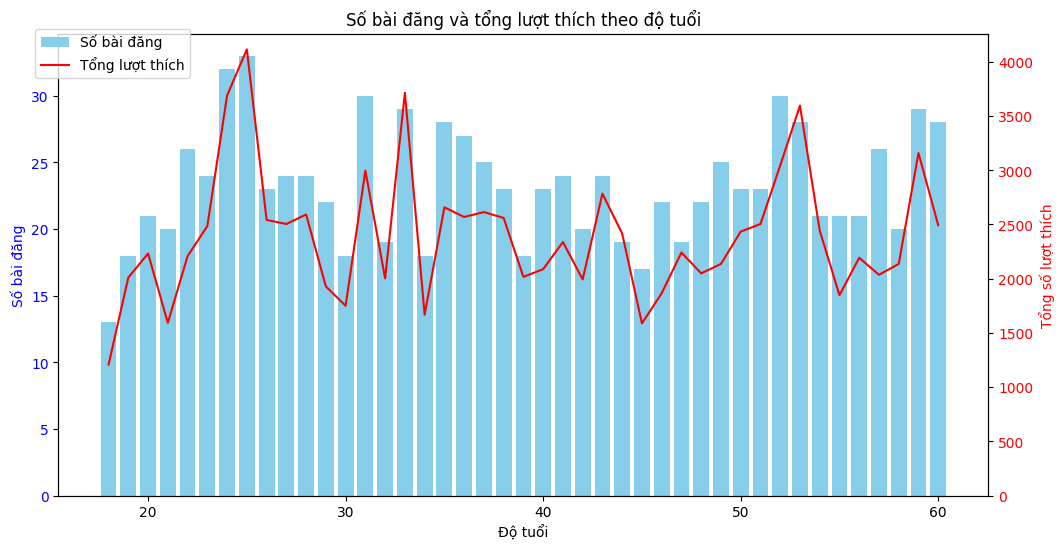

In [159]:
from matplotlib.ticker import MultipleLocator

# Vẽ biểu đồ hỗn hợp
fig, ax1 = plt.subplots(figsize=(12, 6))

# Vẽ biểu đồ cột cho số bài đăng
ax1.bar(posts_by_age.index, posts_by_age.values, color='skyblue', label='Số bài đăng')

# Đặt nhãn cho trục Y bên trái (biểu đồ cột)
ax1.set_xlabel('Độ tuổi')
ax1.set_ylabel('Số bài đăng', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Tạo trục thứ hai (trùng với trục X nhưng riêng trục Y) để vẽ biểu đồ đường
ax2 = ax1.twinx()

# Vẽ biểu đồ đường cho tổng số lượt thích
ax2.plot(total_likes_by_age['Age'], total_likes_by_age['Likes'], color='red', label='Tổng lượt thích')

# Đặt nhãn cho trục Y bên phải (biểu đồ đường)
ax2.set_ylabel('Tổng số lượt thích', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Đặt bước nhảy của trục Y thành 500
ax2.yaxis.set_major_locator(MultipleLocator(500))
ax2.set_ylim(0)  # Điểm bắt đầu của trục Y là 0

# Thêm tiêu đề
plt.title('Số bài đăng và tổng lượt thích theo độ tuổi')

# Hiển thị chú thích
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Hiển thị biểu đồ
plt.show()

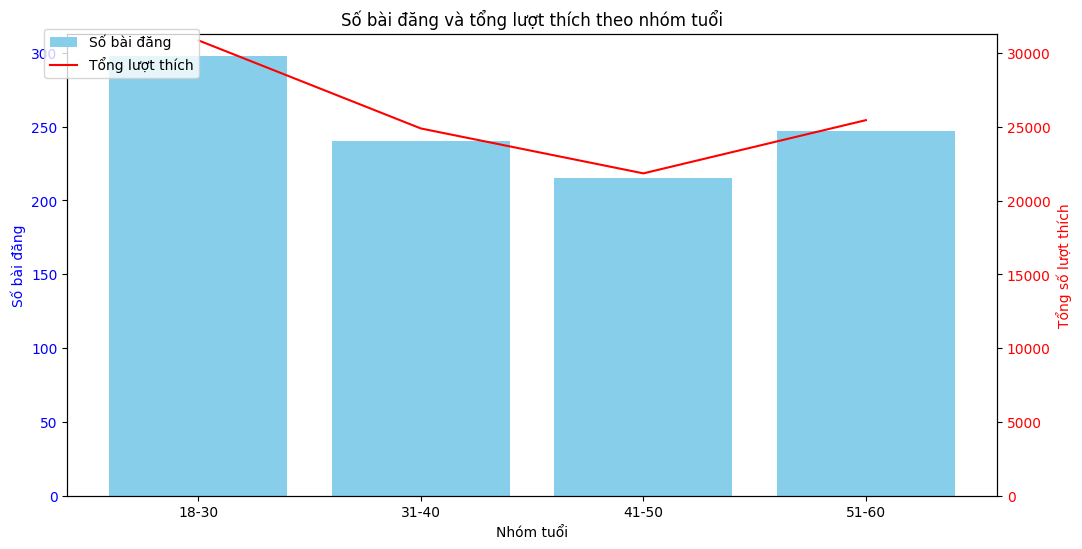

In [162]:
# Vẽ biểu đồ hỗn hợp theo nhóm tuổi
fig, ax3 = plt.subplots(figsize=(12, 6))

# Vẽ biểu đồ cột cho số bài đăng
ax3.bar(posts_by_grouped_age.index, posts_by_grouped_age.values, color='skyblue', label='Số bài đăng')

# Đặt nhãn cho trục Y bên trái (biểu đồ cột)
ax3.set_xlabel('Nhóm tuổi')
ax3.set_ylabel('Số bài đăng', color='blue')
ax3.tick_params(axis='y', labelcolor='blue')

# Tạo trục thứ hai (trùng với trục X nhưng riêng trục Y) để vẽ biểu đồ đường
ax4 = ax3.twinx()

# Vẽ biểu đồ đường cho tổng số lượt thích
ax4.plot(total_likes_by_grouped_age['Grouped_Age'], total_likes_by_grouped_age['Likes'], color='red', label='Tổng lượt thích')

# Đặt nhãn cho trục Y bên phải (biểu đồ đường)
ax4.set_ylabel('Tổng số lượt thích', color='red')
ax4.tick_params(axis='y', labelcolor='red')

# Đặt bước nhảy của trục Y thành 500
ax4.yaxis.set_major_locator(MultipleLocator(5000))
ax4.set_ylim(0)  # Điểm bắt đầu của trục Y là 0

# Thêm tiêu đề
plt.title('Số bài đăng và tổng lượt thích theo nhóm tuổi')

# Hiển thị chú thích
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Hiển thị biểu đồ
plt.show()

> Insight (3): ta có thể thấy được là tổng số lượt thích sẽ thay đổi theo đố lượng bài đăng ở từng độ tuổi, với những độ tuổi có nhiều bài đăng sẽ cho tổng số lượt thích cao hơn, ngược lại nếu số bài đăng ít hơn thì số lượt thích cũng ít hơn. 

Kết luận: dựa theo những gì đã phân tích ở trên, ta có thể kết luận một cách cơ bản là số lượt thích không phụ thuộc vào độ tuổi của người đăng, tuy nhiên tổng số lượt thích lại tỉ lệ thuận vào việc người dùng trong một độ tuổi đăng bài ít hay nhiều. Dữ liệu trong bộ dữ liệu khá ổn định và gần như không có giá trị ngoại lai. Và nếu xét theo từng độ tuổi thì số lượng bài đăng còn khá ít, điều này làm giảm thách thức và hạn chế cho khác phân tích chuyên sâu hơn.

# Yêu cầu 2: Bài đăng được đăng vào các khung giờ nào trong ngày có xu hướng nhận được nhiều/ít lượt tương tác nhất?

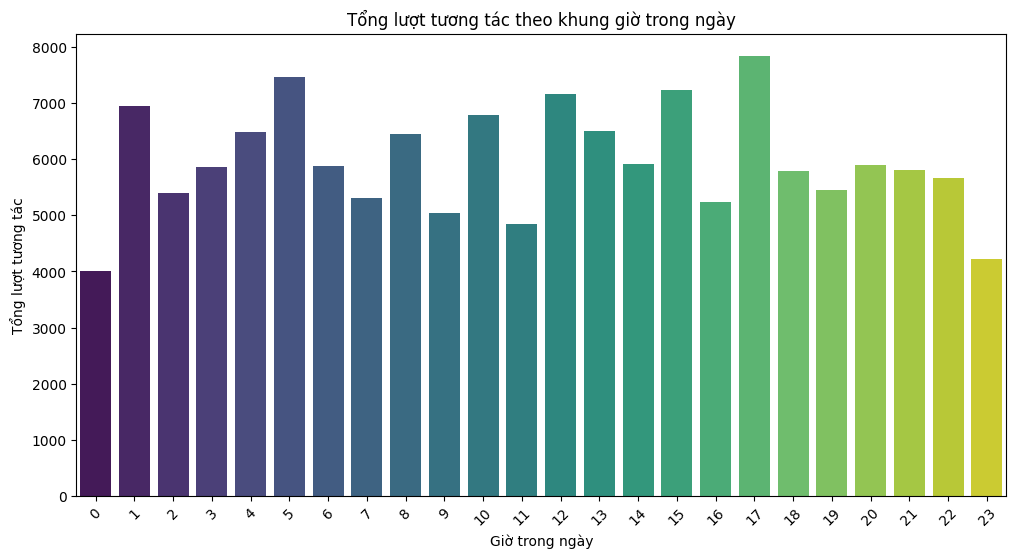

In [15]:
# Trích xuất giờ từ Post_Date
data['Hour'] = data['Post_Date'].dt.hour

# Tính toán tổng lượt tương tác (Likes + Shares + Comments)
data['Total_Interactions'] = data['Likes'] + data['Shares'] + data['Comments']

# Tính tổng lượt tương tác cho từng khung giờ
interactions_by_hour = data.groupby('Hour')['Total_Interactions'].sum().reset_index()

# Vẽ biểu đồ cột thể hiện số tương tác trong mỗi khung giờ
plt.figure(figsize=(12, 6))
sns.barplot(x='Hour', y='Total_Interactions', data=interactions_by_hour, palette='viridis')
plt.title('Tổng lượt tương tác theo khung giờ trong ngày')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Tổng lượt tương tác')
plt.xticks(rotation=45)
plt.show()


> Insight (4): các khung giờ đăng bài có được nhiều lượng tương tác là 1h, 5h, 12h, 15h và cao nhất là 17h; các khung giờ đăng bài có được ít lượng tương tác ít nhất là 0h và 23h.

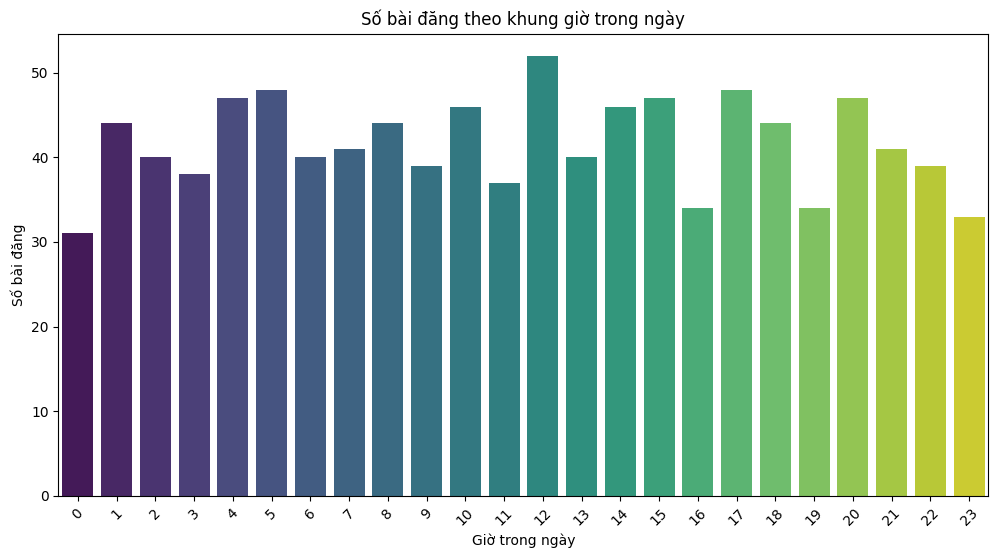

In [16]:
# Tính tổng số bài đăng cho từng khung giờ
posts_by_hour = data['Hour'].value_counts().sort_index()

# Vẽ biểu đồ cột thể hiện số bài đăng trong mỗi khung giờ
plt.figure(figsize=(12, 6))
sns.barplot(x=posts_by_hour.index, y=posts_by_hour.values, palette='viridis')
plt.title('Số bài đăng theo khung giờ trong ngày')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Số bài đăng')
plt.xticks(rotation=45)
plt.show()


Mỗi khung giờ có số lượng bài đăng khác nhau, điều này có thể gây ra mất cân bằng dữ liệu (vd khung giờ có nhiều bài đăng hơn sẽ nhận nhiều lượt thích hơn và ngược lại) làm giảm tính khách quan khi xác định xu hướng. Để khắc phục điều này, ta cần một giá trị có tính khách quan hơn là hiệu suất tương tác trong mỗi khung giờ (số tương tác/số bài đăng)

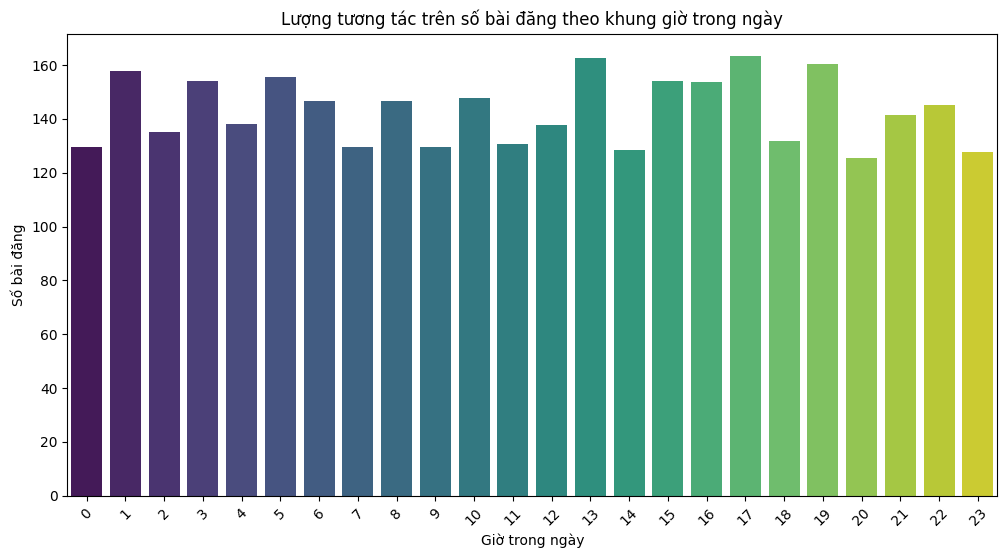

In [17]:
# Tính tỉ lệ lượng tương tác trên số bài đăng
interactions_per_post_by_hour = interactions_by_hour['Total_Interactions'] / posts_by_hour

# Vẽ biểu đồ cột thể hiện số tương tác trong mỗi khung giờ
plt.figure(figsize=(12, 6))
sns.barplot(x=interactions_per_post_by_hour.index, y=interactions_per_post_by_hour.values, palette='viridis')
plt.title('Lượng tương tác trên số bài đăng theo khung giờ trong ngày')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Số bài đăng')
plt.xticks(rotation=45)
plt.show()


Kết luận: các khung giờ có tổng lượng tương tác cao thường là các khung giờ cao điểm như 1h, 5h, 10h, 12h, 15h và 17h; tổng tương tác thấp thường là các khung giờ "nghỉ" 11h, 23h và 0h. Tuy nhiên, nếu xét về hiệu suất thì các khung giờ có hiệu suất tương tác cao là 1h, 13h, 17h và 19h; hiệu suất tương tác thấp là 0h, 7h, 9h, 11h, 14, 20h và 23h.